# Part B

In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas numpy statsmodels


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install qrcode[pil]


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install bitcoinlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install requests


Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install qrcode

Note: you may need to restart the kernel to use updated packages.


1 Explore the Bitcoin Blockchain and Basic Web Coding
(30 marks)

1.1 Extract Information From Your Own Transaction (15 marks)

In [10]:
import requests
import json
from datetime import datetime

your_block_height = 826766  

url = f"https://api.whatsonchain.com/v1/bsv/main/block/height/{your_block_height}"
response = requests.get(url)
data = response.json()

txcount = data['txcount']
time = data['time']
totalFees = data['totalFees']
confirmations = data['confirmations']
miner = data['miner']

human_readable_time = datetime.utcfromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S')

print(json.dumps({
    "txcount": txcount,
    "time": human_readable_time,
    "totalFees": totalFees,
    "confirmations": confirmations,
    "miner": miner
}, indent=4))


{
    "txcount": 3555,
    "time": "2024-01-12 10:11:17",
    "totalFees": 0.0007859699999999137,
    "confirmations": 1,
    "miner": "taal.com"
}


txcount: This represents the number of transactions included in the block. It indicates the block's capacity usage and the number of transactions processed.

time: The timestamp when the block was mined. It's usually given in Unix time format, which counts the seconds since January 1, 1970 (UTC). The code above converts this into a human-readable date and time format.

totalFees: This is the total amount of transaction fees included in the block. Miners receive these fees as a reward for processing transactions and securing the blockchain network.

confirmations: The number of confirmations indicates how many blocks have been added to the blockchain since the block in question was mined. More confirmations typically mean greater security and finality of the transactions in the block.

miner: This field shows the identifier of the miner or mining pool that successfully mined the block. It's a part of the block reward system that incentivizes miners to contribute to the network.

1.2 Basic Web Coding (15 marks)

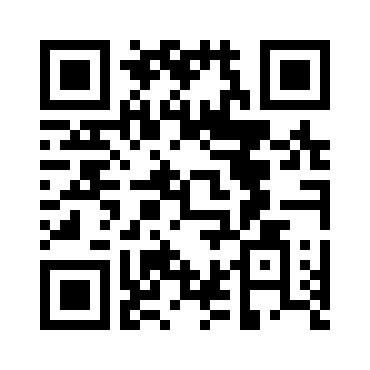

('021b51461c38931e454b153d2bacb9214de8ce65a9bfd530d04e071ef92edddba5',
 '17TX4VDEh1FEmnCc3pbLKdDw5GQouBA7SR')

In [12]:
from bitcoinlib.wallets import Wallet
from bitcoinlib.keys import HDKey
import qrcode
from IPython.display import display, Image

wallet = Wallet.create('LT Wallet')
key = wallet.get_key()
private_key_hex = key.key_private.hex()
hdkey = HDKey(private_key_hex)
public_key_hex = hdkey.public_hex
bitcoin_address = hdkey.address()

qr = qrcode.QRCode(version=1, error_correction=qrcode.constants.ERROR_CORRECT_L, box_size=10, border=4)
qr.add_data(bitcoin_address)
qr.make(fit=True)
img = qr.make_image(fill_color="black", back_color="white")
img.save("bitcoin_address_qr.png")

display(Image(filename="bitcoin_address_qr.png"))

public_key_hex, bitcoin_address


In [13]:
from IPython.display import HTML

html_content = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <!-- Styles and other head elements -->
</head>
<body>
    <div class="container">
        <h1>My Crypto Wallet</h1>
        <div id="walletInfo">
            <p><strong>Public Key:</strong> {public_key_hex}</p>
            <p><strong>Bitcoin Address:</strong> {bitcoin_address}</p>
            <img src="bitcoin_address_qr.png" alt="Bitcoin Address QR Code">
        </div>
    </div>
    <!-- Optional: JavaScript for live cryptocurrency data -->
</body>
</html>
"""

display(HTML(html_content))


2 Time Series Investigation of Bitcoin Price
(45 marks)

2.1 Obtain Time Series Data (5 marks)

1. A chosen price of a cryptocurrency, or any other individual stock that is considered to be high risk


In [14]:
import yfinance as yf
import pandas as pd

amgn = yf.Ticker("AMGN")
data = amgn.history(period="20y") 

print(data.head())

                                Open       High        Low      Close  \
Date                                                                    
2004-01-12 00:00:00-05:00  45.831485  45.932917  44.947605  45.664852   
2004-01-13 00:00:00-05:00  45.744540  46.222706  45.606887  46.186481   
2004-01-14 00:00:00-05:00  46.222709  46.657407  46.077810  46.403835   
2004-01-15 00:00:00-05:00  46.541485  46.722608  45.686585  45.751789   
2004-01-16 00:00:00-05:00  46.063313  46.309638  45.889433  46.005352   

                             Volume  Dividends  Stock Splits  
Date                                                          
2004-01-12 00:00:00-05:00   7963900        0.0           0.0  
2004-01-13 00:00:00-05:00   8559500        0.0           0.0  
2004-01-14 00:00:00-05:00  10241400        0.0           0.0  
2004-01-15 00:00:00-05:00  11031400        0.0           0.0  
2004-01-16 00:00:00-05:00  11376900        0.0           0.0  


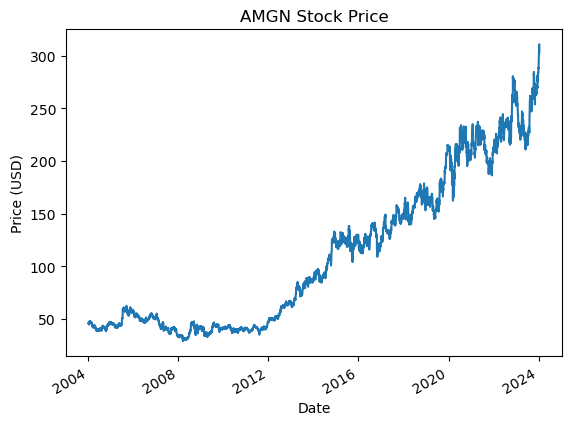

In [15]:
import matplotlib.pyplot as plt

data['Close'].plot(title="AMGN Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


2. A chosen price of an asset that is considered safe, like a stock price for a well known large company (if you like, you can obtain this from other api services like yahoo or quandl, or use FRED as on the course, with Gold price index code, for example ID7108)


In [16]:
import yfinance as yf
import pandas as pd

msft = yf.Ticker("MSFT")
data = msft.history(period="20y")  

print(data.head())


                                Open       High        Low      Close  \
Date                                                                    
2004-01-12 00:00:00-05:00  17.306098  17.343624  17.105955  17.243553   
2004-01-13 00:00:00-05:00  17.231053  17.287343  17.049674  17.156000   
2004-01-14 00:00:00-05:00  17.212281  17.343624  17.181008  17.324862   
2004-01-15 00:00:00-05:00  17.231050  17.337376  17.149742  17.224796   
2004-01-16 00:00:00-05:00  17.331122  17.437448  17.218543  17.393667   

                             Volume  Dividends  Stock Splits  
Date                                                          
2004-01-12 00:00:00-05:00  55845200        0.0           0.0  
2004-01-13 00:00:00-05:00  51555900        0.0           0.0  
2004-01-14 00:00:00-05:00  43907000        0.0           0.0  
2004-01-15 00:00:00-05:00  58504100        0.0           0.0  
2004-01-16 00:00:00-05:00  63983400        0.0           0.0  


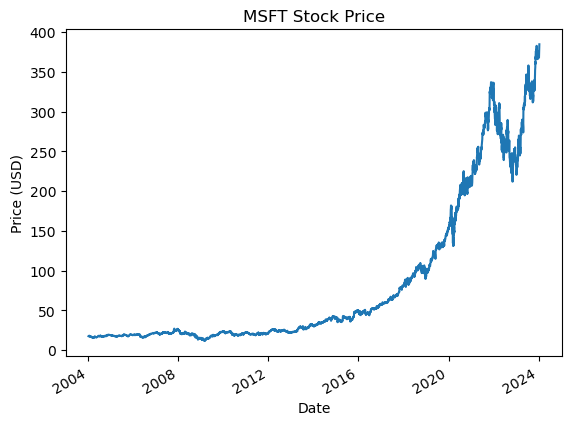

In [17]:
import matplotlib.pyplot as plt

data['Close'].plot(title="MSFT Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()



3. An index measure of overall stock market performance (eg the S&P500)

In [18]:
import yfinance as yf
import pandas as pd

nya = yf.Ticker("NYA")
data = nya.history(period="20y")  

print(data.head())

                                  Open         High          Low        Close  \
Date                                                                            
2004-01-12 00:00:00-05:00  6543.680176  6543.680176  6543.680176  6543.680176   
2004-01-13 00:00:00-05:00  6509.450195  6509.450195  6509.450195  6509.450195   
2004-01-14 00:00:00-05:00  6559.810059  6559.810059  6559.810059  6559.810059   
2004-01-15 00:00:00-05:00  6550.040039  6550.040039  6550.040039  6550.040039   
2004-01-16 00:00:00-05:00  6567.680176  6567.680176  6567.680176  6567.680176   

                           Volume  Dividends  Stock Splits  Capital Gains  
Date                                                                       
2004-01-12 00:00:00-05:00       0        0.0           0.0            0.0  
2004-01-13 00:00:00-05:00       0        0.0           0.0            0.0  
2004-01-14 00:00:00-05:00       0        0.0           0.0            0.0  
2004-01-15 00:00:00-05:00       0        0.0        

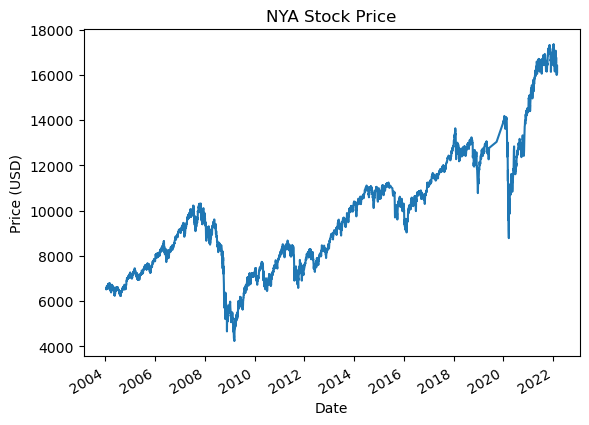

In [19]:
import matplotlib.pyplot as plt

data['Close'].plot(title="NYA Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


2.2 Data Transformations (10 marks)

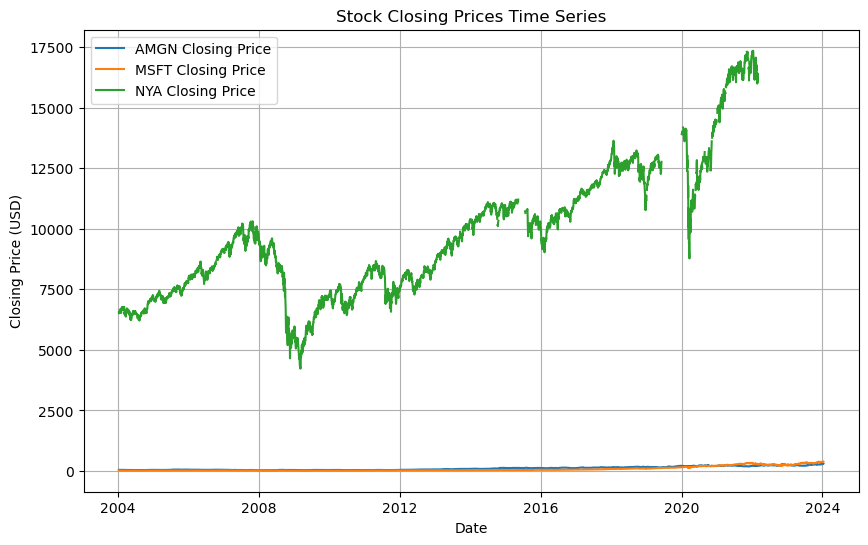

                           AMGN_Close  MSFT_Close    NYA_Close
Date                                                          
2004-01-12 00:00:00-05:00   45.664852   17.243553  6543.680176
2004-01-13 00:00:00-05:00   46.186481   17.156000  6509.450195
2004-01-14 00:00:00-05:00   46.403835   17.324862  6559.810059
2004-01-15 00:00:00-05:00   45.751789   17.224796  6550.040039
2004-01-16 00:00:00-05:00   46.005352   17.393667  6567.680176


In [20]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

tickers = ['AMGN', 'MSFT', 'NYA']  

stock_data = pd.DataFrame()

for ticker in tickers:
    data = yf.Ticker(ticker).history(period="20y")
    stock_data[f'{ticker}_Close'] = data['Close']  
plt.figure(figsize=(10, 6))

for ticker in tickers:
    plt.plot(stock_data.index, stock_data[f'{ticker}_Close'], label=f'{ticker} Closing Price')

plt.title('Stock Closing Prices Time Series')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

print(stock_data.head())


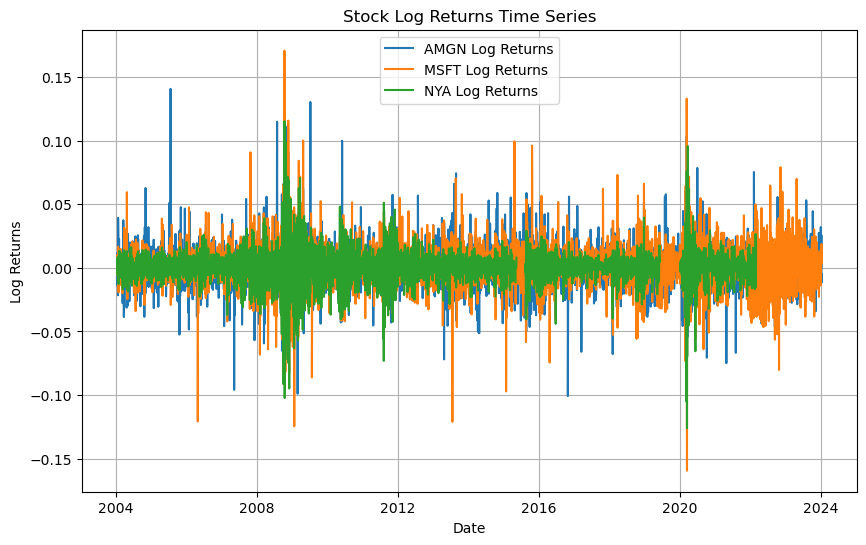

                           AMGN_Close  MSFT_Close  NYA_Close
Date                                                        
2004-01-12 00:00:00-05:00         NaN         NaN        NaN
2004-01-13 00:00:00-05:00    0.011358   -0.005090  -0.005245
2004-01-14 00:00:00-05:00    0.004695    0.009795   0.007707
2004-01-15 00:00:00-05:00   -0.014151   -0.005793  -0.001490
2004-01-16 00:00:00-05:00    0.005527    0.009756   0.002690


In [26]:
import numpy as np

log_returns_df = np.log(stock_data / stock_data.shift(1))

plt.figure(figsize=(10, 6))

for ticker in tickers:
    plt.plot(log_returns_df.index, log_returns_df[f'{ticker}_Close'], label=f'{ticker} Log Returns')

plt.title('Stock Log Returns Time Series')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.grid(True)
plt.show()

print(log_returns_df.head())


2.3 Data Analysis(30 marks)

Interpreting the correlation between the returns on risky and safe assets, and the market returns in the context of CAPM involves several key concepts:

Beta (β): In CAPM, Beta is a measure of the volatility, or systematic risk, of a security or a portfolio in comparison to the market as a whole. A beta greater than 1 indicates that the asset's price is more volatile than the overall market, while a beta less than 1 means it is less volatile.

Risky Assets: These typically have a high beta, meaning their prices are more responsive to changes in the market. They tend to perform better when the market is rising and worse when the market is falling.
Safe Assets: These usually have a low or negative beta, indicating less correlation with market movements. They might not offer high returns during market upswings but can provide stability or even positive returns when the market declines.
Risk-Free Rate: In CAPM, the risk-free rate is the return of an investment with zero risk, typically represented by government bonds. The risk-free rate is a baseline against which the performance of risky assets is compared.

Expected Market Return: This is the return expected from the market as a whole, often represented by a broad market index like the S&P 500.

Security Market Line (SML): This line represents the expected return of a security given its beta. It's a graphical representation of the CAPM formula, where the slope is determined by the market risk premium (expected market return minus risk-free rate).

Interpreting Correlations:

If risky assets are showing a high positive correlation with market returns, it indicates that they are performing as expected according to CAPM, offering higher returns for higher risk (high beta).
If safe assets show a low or negative correlation with market returns, this also aligns with CAPM, as these assets should offer lower returns with lower risk (low or negative beta).
Diversification: According to CAPM, diversification can reduce unsystematic risk but not systematic risk. Thus, holding a mix of risky and safe assets can reduce a portfolio's total risk without necessarily diminishing expected returns.

In summary, under CAPM, risky assets are expected to yield higher returns than safe assets due to their higher beta, but also come with greater volatility and systematic risk. Safe assets, with their lower or negative beta, provide stability and can act as a hedge during market downturns. The observed correlations between these assets and market returns can often be explained through the lens of CAPM, highlighting the trade-offs between risk and expected return.








In [22]:
import yfinance as yf
import pandas as pd

msft_ticker = yf.Ticker("MSFT")
msft_data = msft_ticker.history(period="20y")

nya_ticker = yf.Ticker("NYA")
nya_data = nya_ticker.history(period="20y")

annual_risk_free_rate = 0.01
daily_risk_free_rate = (1 + annual_risk_free_rate) ** (1/252) - 1

msft_data['Daily Return'] = msft_data['Close'].pct_change()
nya_data['Daily Return'] = nya_data['Close'].pct_change()

msft_data['Excess Return'] = msft_data['Daily Return'] - daily_risk_free_rate
nya_data['Excess Return'] = nya_data['Daily Return'] - daily_risk_free_rate

In [23]:
import statsmodels.api as sm

y = msft_data['Excess Return'].dropna()

X = sm.add_constant(nya_data['Excess Return'].dropna())

y, X = y.align(X, join='inner')

model = sm.OLS(y, X).fit()

model_summary = model.summary()
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:          Excess Return   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     3289.
Date:                Fri, 12 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:14:24   Log-Likelihood:                 12653.
No. Observations:                4301   AIC:                        -2.530e+04
Df Residuals:                    4299   BIC:                        -2.529e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0004      0.000      2.310

1. **Intercept (α)**: The coefficient for the constant is 0.0004 with a p-value of 0.021. This suggests that the intercept is significantly different from zero at the 5% level, implying that the asset has a statistically significant abnormal return over the risk-free rate, after accounting for its market risk. Although this contradicts the CAPM assumption that α should be zero, it's not uncommon to find a small but significant α in empirical tests due to various market anomalies or inefficiencies.

2. **Slope (β)**: The β coefficient is 0.8789, indicating that the asset is less volatile than the market (since it's less than 1). The p-value is very close to 0, which indicates that this finding is highly statistically significant. This suggests that the asset's returns are positively correlated with market returns, but it experiences less than proportional fluctuations compared to the market.

3. **R-squared**: The R-squared value is 0.433, which means that approximately 43.3% of the variability in the asset's excess returns can be explained by the variability in the market's excess returns. While this indicates a moderate level of explanatory power, it also implies that over half of the asset's excess returns are due to factors not accounted for by the market index alone.

4. **F-statistic**: The F-statistic is 3289 with a p-value of 0.00, which is indicative of a very strong relationship between the market excess returns and the asset's excess returns. This means that the regression model is statistically significant and the independent variable (market excess returns) reliably predicts the dependent variable (asset excess returns).

5. **Durbin-Watson**: The Durbin-Watson statistic is 2.040, which is close to 2, suggesting that there is no significant autocorrelation in the residuals of the regression. This is a good sign for the validity of the model.

6. **Jarque-Bera (JB)**: The JB statistic is high, and the associated probability is 0.00, indicating that the residuals are not normally distributed. This could be a concern because OLS assumes normality in the residuals for the validity of hypothesis tests. The non-normality could be due to large outliers or other forms of non-linearity in the data.

In summary, the asset seems to have a lower systematic risk than the market but provides a small, statistically significant excess return over what would be predicted by CAPM. The model has a moderate fit for explaining the asset's excess returns using market excess returns, but there are other factors affecting the asset's performance that are not captured by the market index. Additionally, the abnormal distribution of the residuals could suggest that the model might not be capturing all relevant risk factors, or there could be structural changes or events affecting asset returns.

3 Machine Learning in Practice (25 marks)

3.1 High Level Description of FinTech Firm (10 marks)

Sarunas' FinTech firm is designed as a sophisticated entity composed of four structural parts, each contributing uniquely to the firm’s overall functionality. The firm operates in the realm of financial technology, integrating advanced computational techniques to improve and innovate in the financial sector.

Data Collection and Preprocessing Module: This is the foundation of the firm’s structure. This module is responsible for gathering a wide range of financial data, which can include market prices, trading volumes, economic indicators, and news reports. The preprocessing aspect of this module cleans and formats this data into a structured format, making it suitable for analysis. This could involve handling missing values, normalizing data, and categorizing unstructured data into a usable form.

Analytics Engine: The core of the firm's analytical capability lies in this module. Utilizing the processed data, this engine applies various statistical and machine learning techniques to extract insights. These insights might include trend analysis, predictive modeling, risk assessment, and portfolio optimization. The engine is designed to be both powerful and flexible, capable of adapting to different types of financial data and analysis needs.

Logistic Regression Module: Within the analytics engine, logistic regression plays a crucial role. It is a statistical method used for binary classification problems – a common requirement in finance, such as predicting whether a stock price will go up or down. Logistic regression estimates the probability of a binary outcome based on one or more independent variables. It’s particularly useful because it not only provides a classification result but also quantifies the probability of the outcome, offering a degree of certainty that can be crucial in financial decision-making.

User Interface and Reporting System: This module acts as the point of interaction with the firm's users, which could range from individual investors to large institutions. It presents the insights and analysis in an accessible and understandable format. This can include dashboards, detailed reports, and real-time alerts. The system is designed to be user-friendly, ensuring that complex financial data is translated into actionable information.

The interaction between these modules creates a streamlined workflow. Data collected by the first module is analyzed by the analytics engine, with logistic regression providing key predictive insights. The results are then communicated to users through the interface and reporting system. This structure allows the firm to turn raw financial data into actionable, data-driven decisions, offering a competitive edge in the fast-paced world of finance.

Overall, Sarunas’ FinTech firm stands as a testament to the power of integrating technology with finance, harnessing the potential of data science and machine learning to drive financial innovation and efficiency.








3.2 Written Description of Python Code (10 marks)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               517 non-null    object 
 1   Engine Type              517 non-null    object 
 2   HP or lbs thr ea engine  517 non-null    object 
 3   Max speed Knots          497 non-null    object 
 4   Rcmnd cruise Knots       507 non-null    float64
 5   Stall Knots dirty        502 non-null    float64
 6   Fuel gal/lbs             517 non-null    int64  
 7   All eng rate of climb    513 non-null    object 
 8   Eng out rate of climb    491 non-null    float64
 9   Takeoff over 50ft        492 non-null    float64
 10  Landing over 50ft        517 non-null    object 
 11  Empty weight lbs         516 non-null    object 
 12  Length ft/in             517 non-null    object 
 13  Wing span ft/in          517 non-null    object 
 14  Range N.M.               4

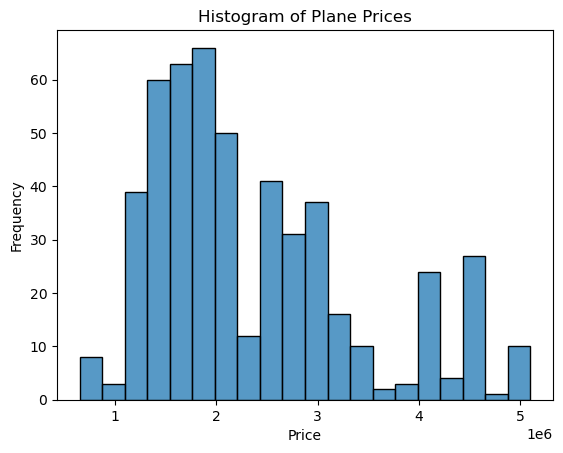

/Users/liantao/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/liantao/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


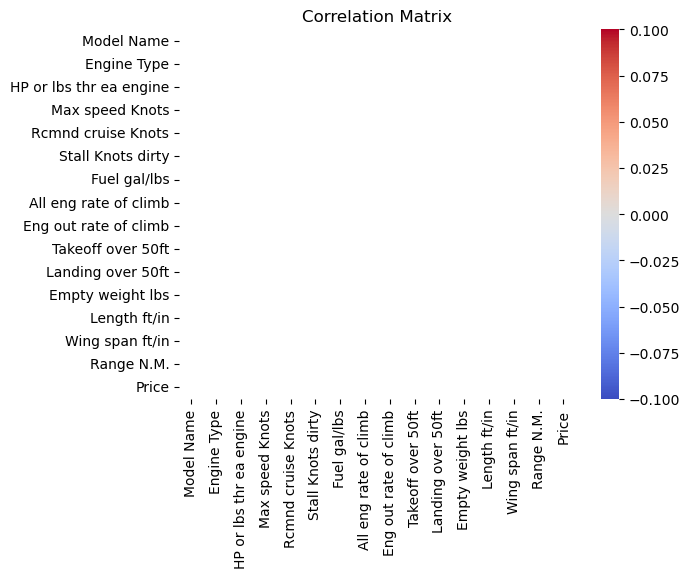

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Plane Price.csv')

print(df.info())
print(df.head())

print(df.isnull().sum())

print(df.describe())

sns.histplot(df['Price'], bins=20)
plt.title('Histogram of Plane Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

df_numeric = df.apply(pd.to_numeric, errors='coerce')

df_numeric = df_numeric.dropna()

correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


3.3 Build your own Machine Learning Model (5 marks)

        Date      Open      High       Low     Close  Adj Close     Volume
0 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.099319  469033600
1 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094137  175884800
2 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087228  105728000
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089387   86441600
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091978   73449600
Mean Squared Error: 1034.0290955231233


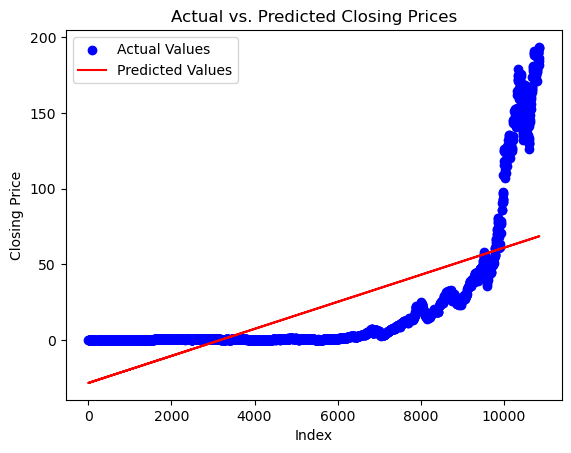

In [25]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

base_url = 'https://query1.finance.yahoo.com/v7/finance/download/'
stock = 'AAPL'
params = 'period1=0&period2=9999999999&interval=1d&events=history'
url = f'{base_url}{stock}?{params}'
df = pd.read_csv(url, parse_dates=['Date'])

print(df.head())

y = df['Close'].values.reshape(-1, 1)
X = np.arange(df.shape[0]).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.plot(X_test, y_pred, color='red', label='Predicted Values')
plt.title('Actual vs. Predicted Closing Prices')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.show()
